In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 93% 81.0M/86.8M [00:00<00:00, 196MB/s]
100% 86.8M/86.8M [00:00<00:00, 192MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/brain-tumor-classification-mri.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [7]:
conv_base.trainable = False

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/Training',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='sparse') 

validation_generator = test_datagen.flow_from_directory(
        '/content/Testing',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='sparse')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
history =model.fit_generator(
        train_generator,
        epochs=5,
        validation_data=validation_generator)

<ipython-input-13-b542fcd576a5>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history =model.fit_generator(


Epoch 1/5
90/90 [==============================] - 763s 8s/step - loss: 0.7092 - accuracy: 0.7132 - val_loss: 1.5507 - val_accuracy: 0.5203
Epoch 2/5
90/90 [==============================] - 761s 8s/step - loss: 0.4617 - accuracy: 0.8244 - val_loss: 1.5396 - val_accuracy: 0.6244
Epoch 3/5
90/90 [==============================] - 762s 8s/step - loss: 0.3695 - accuracy: 0.8599 - val_loss: 1.2164 - val_accuracy: 0.6827
Epoch 4/5
90/90 [==============================] - 756s 8s/step - loss: 0.3497 - accuracy: 0.8631 - val_loss: 1.6945 - val_accuracy: 0.6091
Epoch 5/5
90/90 [==============================] - 754s 8s/step - loss: 0.3459 - accuracy: 0.8732 - val_loss: 1.1941 - val_accuracy: 0.7107


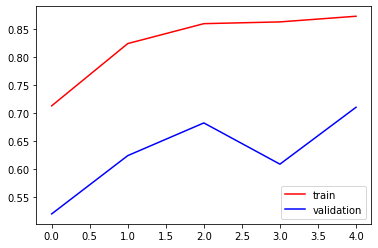

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

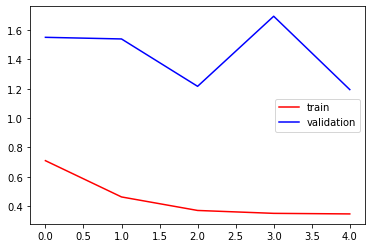

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()